# 6. 信号処理

## 同期加算による信号の分離

信号よりも雑音が大きいという悪条件の中で信号を取り出す方法。信号が繰り返し発せられることを知っているものとする。下図のように、信号を時系列上で同意地にして加算することで、雑音の影響を少なくすることが出来る。

![](https://www.ishikawa-lab.com/montecarlo/jpg/fig7-4-1.jpg)

### 原理

中心極限定理により、いかなる分布の乱数も、 $m$ 回加算した後の分布を見ると、分散が $m\sigma^2$（$\sigma^2$: もとの乱数の分散）の正規分布に近づく。すなわち、標準偏差は $\sqrt{m}\sigma$ になる。

$m$ 回加算した後に加算回数で割る（=平均を取る）と、標準偏差は、

$$
    \frac{\sqrt{m}\sigma}{m} = \frac{\sigma}{\sqrt{m}}
$$

となる。ガウス雑音の平均振幅は標準偏差で表されるので、ガウス雑音を次々 $m$ 回加算して平均をとると、その大きさは $1/\sqrt{m}$ になる。一方、信号の方は、タイミングを合わせて（同期して）加算されるので、平均振幅は変わらない。よって、信号と雑音の比（=「S/N比」）は加算回数に従って改善されていく。

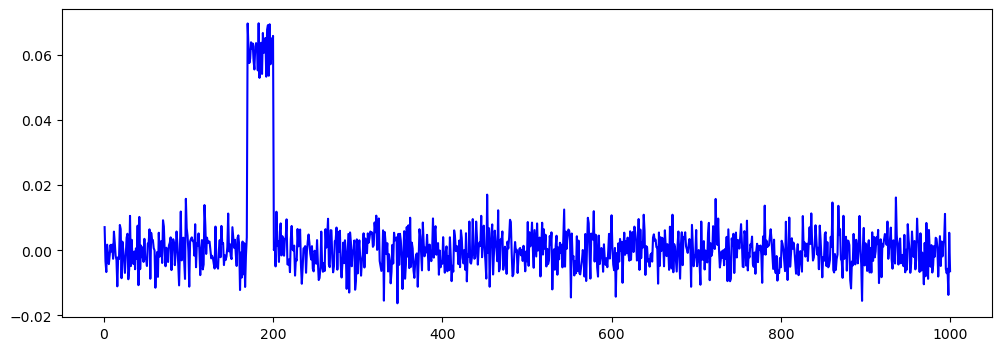

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc99e4d4850>

In [22]:
using PyPlot

x0 = 0.5     # 信号のピーク値
w = 0.3      # 信号の幅
σ = 0.5      # 雑音の標準偏差
t_end = 10.0 # シミュレーションの終了時刻
Δt = 0.01    # シミュレーションの刻み
n_end = 128   # 加算回数の最大
mm = 1       # 表示する加算回数

# パルス信号を返却する
function signal(t::Float64, peak::Float64, width::Float64)::Float64
    t0 = 1.7 # パルス開始時刻
    
    if t0 <= t <= (t0 + width)
        return peak
    else
        return 0.0
    end
end

# ノイズ（ガウス雑音）を発生させる
function noise(sd::Float64)::Float64
    xw = 0.0
    
    for i = 1:12
        xw += rand()
    end
    
    return sd * (xw - 6.0)
end

function main()
    m = Int(t_end / Δt)
    mem = zeros(Float64, m)
    for j = 0:n_end
        for i = 1:m
            x = noise(σ) + signal(i * Δt, x0, w)
            mem[i] = (mem[i] * m + x) / (m + 1)
        end
    end
    
    fig = PyPlot.figure(figsize=(12.0, 4.0))
    ax = fig.add_subplot()
    x = 1:m
    ax.plot(x, mem, color="blue")
end

main()